matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, , edgecolors=None, plotnonfinite=False, data=None, *kwargs)

参数说明：

x，y：长度相同的数组，也就是我们即将绘制散点图的数据点，输入数据。

s：点的大小，默认 20，也可以是个数组，数组每个参数为对应点的大小。

c：点的颜色，默认蓝色 'b'，也可以是个 RGB 或 RGBA 二维行数组。

marker：点的样式，默认小圆圈 'o'。

cmap：Colormap，默认 None，标量或者是一个 colormap 的名字，只有 c 是一个浮点数数组的时才使用。如果没有申明就是 image.cmap。

norm：Normalize，默认 None，数据亮度在 0-1 之间，只有 c 是一个浮点数的数组的时才使用。

vmin，vmax：：亮度设置，在 norm 参数存在时会忽略。

alpha：：透明度设置，0-1 之间，默认 None，即不透明。

linewidths：：标记点的长度。

edgecolors：：颜色或颜色序列，默认为 'face'，可选值有 'face', 'none', None。

plotnonfinite：：布尔值，设置是否使用非限定的 c ( inf, -inf 或 nan) 绘制点。

**kwargs：：其他参数。

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

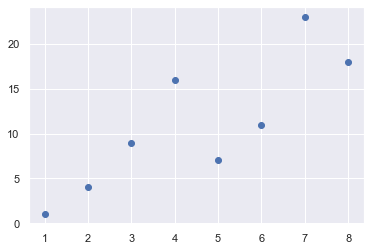

In [31]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 4, 9, 16, 7, 11, 23, 18])

plt.scatter(x, y)
plt.show()

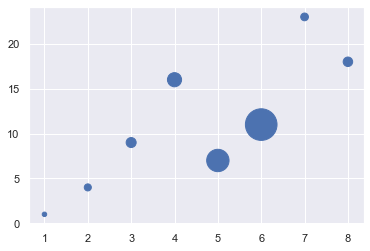

In [32]:
#设置图标大小
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 4, 9, 16, 7, 11, 23, 18])
sizes = np.array([20,50,100,200,500,1000,60,90])
plt.scatter(x, y, s=sizes)
plt.show()

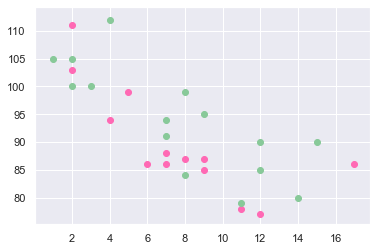

In [33]:
#设置两组散点图
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.show()

# 相关性分析

In [28]:
import seaborn as sns

In [7]:
#tips = sns.load_dataset("tips")
tips = pd.read_csv('./tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [18]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [19]:
for i in tips.select_dtypes(include="object").columns:
    print(tips[i].value_counts())
    print('-'*50)

Male      157
Female     87
Name: sex, dtype: int64
--------------------------------------------------
No     151
Yes     93
Name: smoker, dtype: int64
--------------------------------------------------
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
--------------------------------------------------
Dinner    176
Lunch      68
Name: time, dtype: int64
--------------------------------------------------


In [8]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


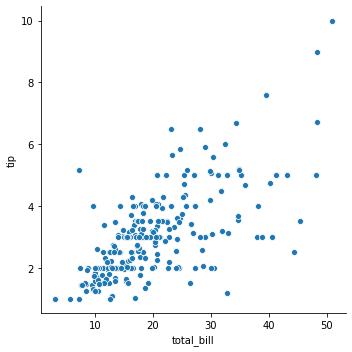

In [9]:
#查看total_bill和tip之间的相关关系
sns.relplot(x='total_bill',y='tip',data=tips)

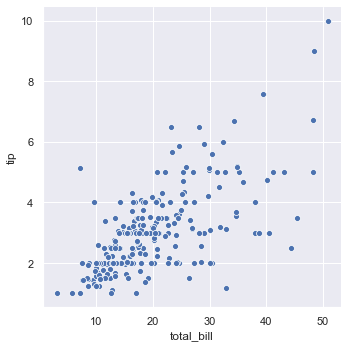

In [10]:
# 定义主题风格
sns.set(style="darkgrid")
sns.relplot(x='total_bill',y='tip',data=tips)

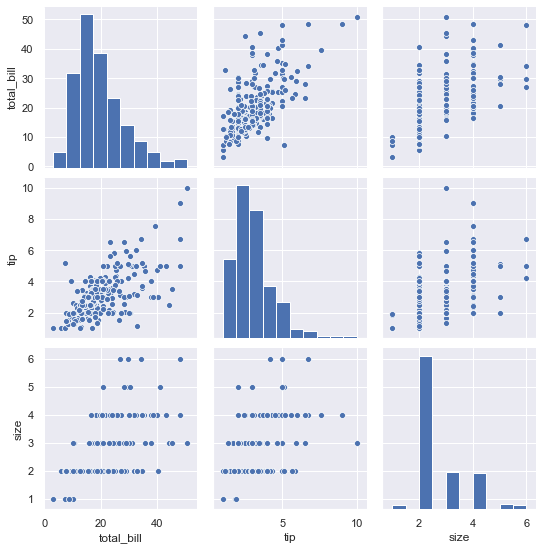

In [11]:
sns.pairplot(tips)

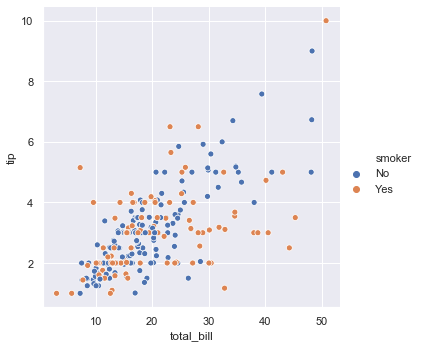

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker",  data=tips)# 利用hue 进行区分

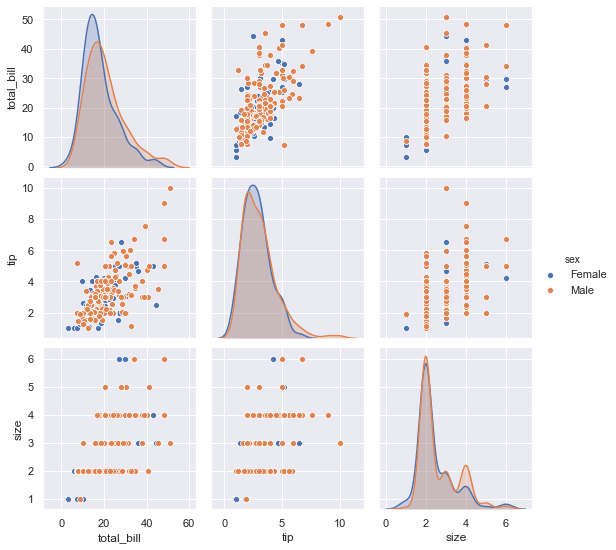

In [13]:
sns.pairplot(tips ,hue ='sex')

In [23]:
df = pd.get_dummies(tips)
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [24]:
corr_df = df.corr()
corr_df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


In [27]:
corr_df['tip'].sort_values(ascending=False)

tip            1.000000
total_bill     0.675734
size           0.489299
day_Sun        0.125114
time_Dinner    0.121629
sex_Male       0.088862
smoker_Yes     0.005929
day_Sat       -0.002790
smoker_No     -0.005929
day_Fri       -0.055463
sex_Female    -0.088862
day_Thur      -0.095879
time_Lunch    -0.121629
Name: tip, dtype: float64